## IMDB Indian Movie Rating Prediction

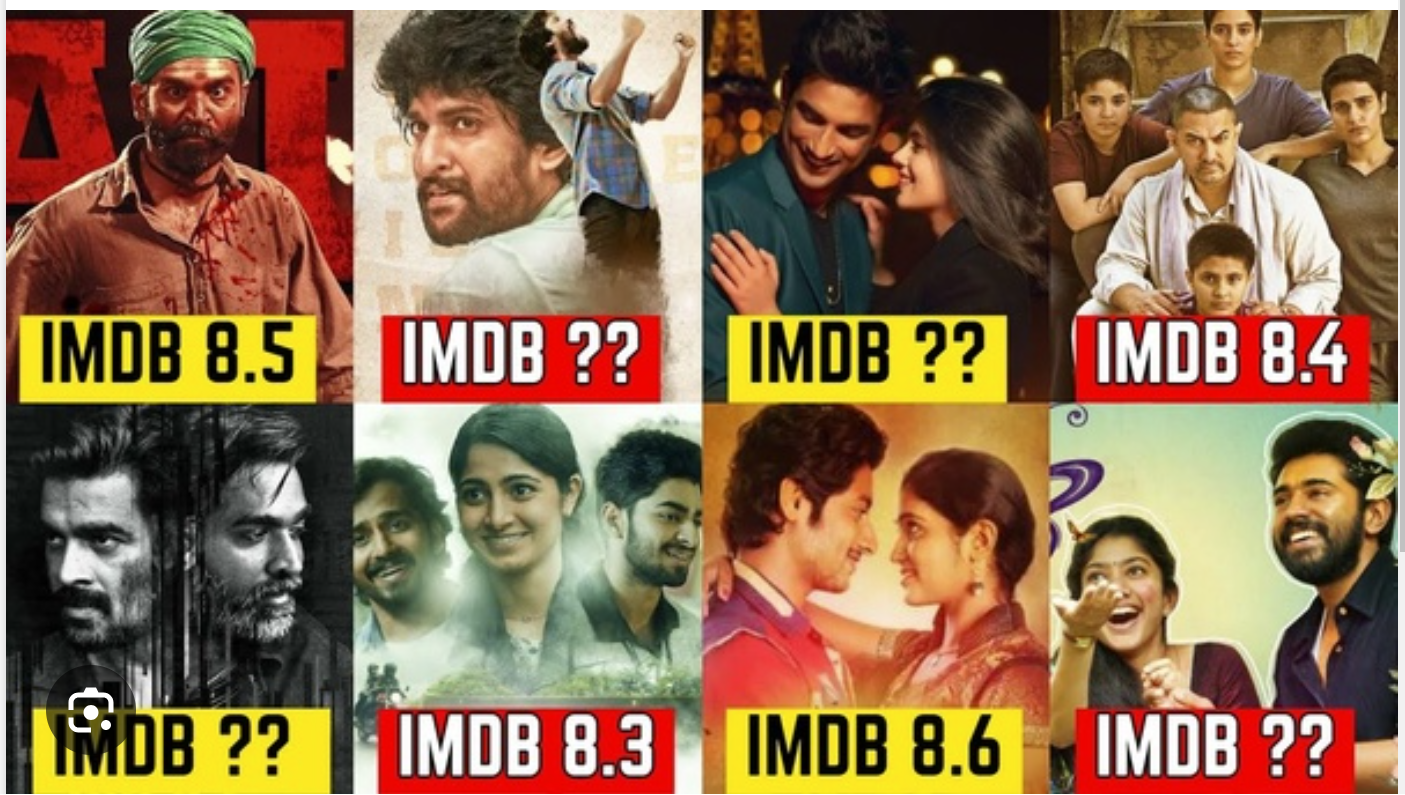

In this project, we are using a IMDB indian movie data set from Kaggle and predict the movie rating based on features like Genre, Director, Actor etc.

So let's start

### Importing all the required dependencies

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
colors = ['#FFAA33']

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
movie_data = pd.read_csv("IMDb Movies India.csv", encoding='latin-1')
movie_data.head()

Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4      Antara Mali

In [3]:
#knowing the general information abou the data
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
movie_data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [5]:
# Locating rows with missing values in columns from 1 to 9

null_value = movie_data[movie_data.iloc[:, 1:9].isna().all(axis=1)]
null_value.head()

Name Year Duration Genre  Rating Votes Director Actor 1  \
1836  Bang Bang Reloaded  NaN      NaN   NaN     NaN   NaN      NaN     NaN   
1920   Battle of bittora  NaN      NaN   NaN     NaN   NaN      NaN     NaN   
2653              Campus  NaN      NaN   NaN     NaN   NaN      NaN     NaN   
3403         Dancing Dad  NaN      NaN   NaN     NaN   NaN      NaN     NaN   
3807            Dial 100  NaN      NaN   NaN     NaN   NaN      NaN     NaN   

     Actor 2 Actor 3  
1836     NaN     NaN  
1920     NaN     NaN  
2653     NaN     NaN  
3403     NaN     NaN  
3807     NaN     NaN

In [6]:
#Checking if there are any typos in all the columns of the given dataset

for col in movie_data.select_dtypes(include = "object"):
    print(f"Name of Column: {col}")
    print(movie_data[col].unique())
    print('\n', '-'*80, '\n')

Name of Column: Name
[' ' '#Gadhvi (He thought he was Gandhi)' '#Homecoming' ... 'Zulmi Raj'
 'Zulmi Shikari' 'Zulm-O-Sitam']

 -------------------------------------------------------------------------------- 

Name of Column: Year
[nan '(2019)' '(2021)' '(2010)' '(1997)' '(2005)' '(2008)' '(2012)'
 '(2014)' '(2004)' '(2016)' '(1991)' '(1990)' '(2018)' '(1987)' '(1948)'
 '(1958)' '(2017)' '(2020)' '(2009)' '(2002)' '(1993)' '(1946)' '(1994)'
 '(2007)' '(2013)' '(2003)' '(1998)' '(1979)' '(1951)' '(1956)' '(1974)'
 '(2015)' '(2006)' '(1981)' '(1985)' '(2011)' '(2001)' '(1967)' '(1988)'
 '(1995)' '(1959)' '(1996)' '(1970)' '(1976)' '(2000)' '(1999)' '(1973)'
 '(1968)' '(1943)' '(1953)' '(1986)' '(1983)' '(1989)' '(1982)' '(1977)'
 '(1957)' '(1950)' '(1992)' '(1969)' '(1975)' '(1947)' '(1972)' '(1971)'
 '(1935)' '(1978)' '(1960)' '(1944)' '(1963)' '(1940)' '(1984)' '(1934)'
 '(1955)' '(1936)' '(1980)' '(1966)' '(1949)' '(1962)' '(1964)' '(1952)'
 '(1933)' '(1942)' '(1939)' '(1954)' '(1945

In [7]:
# Handling the null values
movie_data.dropna(subset=['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

#cleaning the name column by extracting only the text part
movie_data['Name'] = movie_data['Name'].str.extract('([A-Za-z\s\'\-]+)')

# Removing the brackets from the year column and keeping the value part
movie_data['Year'] = movie_data['Year'].str.replace(r'[()]', '', regex=True).astype(int)

# Convert 'Duration' to numeric data type and replacing by min, while keeping only numerical part
movie_data['Duration'] = pd.to_numeric(movie_data['Duration'].str.replace(r' min', '', regex=True), errors='coerce')

# Splitting genre by (,), and keeping only unique values as well as replacing the null values with mode
movie_data['Genre'] = movie_data['Genre'].str.split(', ')
movie_data = movie_data.explode('Genre')
movie_data['Genre'].fillna(movie_data['Genre'].mode()[0], inplace=True)

# Convert 'Votes' to numeric and replace the (,) with ('') as well as keeping only numerical part
movie_data['Votes'] = pd.to_numeric(movie_data['Votes'].str.replace(',', ''), errors='coerce')

In [8]:
#checking duplicate values by Name and Year

duplicate = movie_data.groupby(['Name', 'Year']).filter(lambda x: len(x) > 1)
duplicate.head(5)

Name  Year  Duration    Genre  Rating  Votes      Director  \
3             Yaaram  2019       110   Comedy     4.4     35    Ovais Khan   
3             Yaaram  2019       110  Romance     4.4     35    Ovais Khan   
5  Aur Pyaar Ho Gaya  1997       147   Comedy     4.7    827  Rahul Rawail   
5  Aur Pyaar Ho Gaya  1997       147    Drama     4.7    827  Rahul Rawail   
5  Aur Pyaar Ho Gaya  1997       147  Musical     4.7    827  Rahul Rawail   

      Actor 1                 Actor 2          Actor 3  
3     Prateik              Ishita Raj  Siddhant Kapoor  
3     Prateik              Ishita Raj  Siddhant Kapoor  
5  Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  
5  Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor  
5  Bobby Deol  Aishwarya Rai Bachchan    Shammi Kapoor

In [9]:
# Dropping the duplicated values by Name
movie_data = movie_data.drop_duplicates(subset=['Name'], keep=False)

 Insights:
 
Every column had null values except name column

Columns: Name, Year, Duration, Genre, and Votes had typos that were corrected

Dropped the null values for most of the columns, For 'Genre' it is replaced by mode

Duplicate values  checked and dropped them based on 'Name' column

### Data Analysis

In [10]:
#getting the statistical inference of the data

movie_data.describe()

Year     Duration       Rating          Votes
count  1528.000000  1528.000000  1528.000000    1528.000000
mean   1997.972513   123.823953     5.976243     552.479712
std      21.181921    25.108144     1.412547    4311.631841
min    1931.000000    45.000000     1.600000       5.000000
25%    1985.000000   107.000000     5.100000      14.000000
50%    2004.000000   126.000000     6.100000      34.000000
75%    2016.000000   140.000000     7.000000     127.250000
max    2021.000000   300.000000     9.400000  101014.000000

In [11]:
# to see the information about categorical column

movie_data.describe(include = 'O')

Name  Genre    Director             Actor 1  \
count            1528   1528        1528                1528   
unique           1528     20        1114                1010   
top     Gustakhi Maaf  Drama  Kanti Shah  Mithun Chakraborty   
freq                1    789          13                  22   

                   Actor 2 Actor 3  
count                 1528    1528  
unique                1131    1154  
top     Mithun Chakraborty    Pran  
freq                    12      16

In [12]:
# Find the row with the highest number of votes
max_votes = movie_data[movie_data['Votes'] == movie_data['Votes'].max()]

# Get the name of the movie with the highest votes
movie_h_votes = max_votes['Name'].values[0]

# Find the number of votes for the movie with the highest votes
votes_h_votes = max_votes['Votes'].values[0]

print("Movie with the highest votes:", movie_h_votes)
print("Number of votes for the movie with the highest votes:", votes_h_votes)
print('\n', '*'*80, '\n')


# Find the row with the lowest number of votes
min_votes = movie_data[movie_data['Votes'] == movie_data['Votes'].min()]

# Get the name of the movie with the lowest votes
movie_l_votes = min_votes['Name'].values[0]

# Find the number of votes for the movie with the lowest votes
votes_l_votes = min_votes['Votes'].values[0]

print("Movie with the lowest votes:", movie_l_votes)
print("Number of votes for the movie with the lowest votes:", votes_l_votes)

Movie with the highest votes: My Name Is Khan
Number of votes for the movie with the highest votes: 101014

 ******************************************************************************** 

Movie with the lowest votes: Anmol Sitaare
Number of votes for the movie with the lowest votes: 5


In [14]:
# Find the row with the highest rating
max_rating = movie_data[movie_data['Rating'] == movie_data['Rating'].max()]
movie_h_rating = max_rating['Name'].values[0]
votes_h_rating = max_rating['Votes'].values[0]

print("Movie with the highest rating:", movie_h_rating)
print("Number of votes for the movie with the highest rating:", votes_h_rating)
print('\n', '*'*80, '\n')


# Find the row with the lowest rating
min_rating = movie_data[movie_data['Rating'] == movie_data['Rating'].min()]
movie_l_rating = min_rating['Name'].values[0]
votes_l_rating = min_rating['Votes'].values[0]

print("Movie with the lowest rating:", movie_l_rating)
print("Number of votes for the movie with the lowest rating:", votes_l_rating)

Movie with the highest rating: June
Number of votes for the movie with the highest rating: 18

 ******************************************************************************** 

Movie with the lowest rating: Mumbai Can Dance Saalaa
Number of votes for the movie with the lowest rating: 43


In [15]:
# Group the dataset by the 'Director' column and count the number of movies each director has directed
director_counts = movie_data['Director'].value_counts()

# Find the director with the highest number of movies directed
director_with_highest_count = director_counts.idxmax()
num_movies_directed = director_counts.max()

print("Director with the most movies directed:", director_with_highest_count)
print("Number of movies directed by", director_with_highest_count, ":", num_movies_directed)
print('\n', '*'*80, '\n')


# Group the dataset by the 'Director' column and count the number of movies each director has directed
director_counts = movie_data['Director'].value_counts()

# Find the director with the lowest number of movies directed
director_with_lowest_count = director_counts.idxmin()
num_movies_directed = director_counts.min()

print("Director with the least movies directed:", director_with_lowest_count)
print("Number of movies directed by", director_with_lowest_count, ":", num_movies_directed)

Director with the most movies directed: Kanti Shah
Number of movies directed by Kanti Shah : 13

 ******************************************************************************** 

Director with the least movies directed: Aamir Bashir
Number of movies directed by Aamir Bashir : 1


Insights:

The first year a movie was release is 1931

The minimum duration is of 45min

Drama Genre is the most famous genre

Mithun is the most famous actor

'My name is Khan' had the highest number of votes, and 'June' had the highest rating

'Kanti Shah' directed most of the movies

#### Analysis on discrete variables

In [16]:
year_fig = px.histogram(movie_data, x = 'Year', histnorm='probability density', nbins = 30, color_discrete_sequence = colors)
year_fig.update_traces(selector=dict(type='histogram'))
year_fig.update_layout(title='Distribution of Year', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Year', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
year_fig.show()

In [17]:
duration_fig = px.histogram(movie_data, x = 'Duration', histnorm='probability density', nbins = 40, color_discrete_sequence = colors)
duration_fig.update_traces(selector=dict(type='histogram'))
duration_fig.update_layout(title='Distribution of Duration', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Duration', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
duration_fig.show()

In [18]:
rating_fig = px.histogram(movie_data, x = 'Rating', histnorm='probability density', nbins = 40, color_discrete_sequence = colors)
rating_fig.update_traces(selector=dict(type='histogram'))
rating_fig.update_layout(title='Distribution of Rating', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Rating', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
rating_fig.show()

Insights:

The distribution of Year is skewed towards left with a high concentration of movies directed in between 2015-2019

The duration of movies has a guassian distribution with a very few outliers

The distribution of Rating is also having a guassian distribution with a high concentration of 6.6 and 6.7

The number of votes has a plenty of outliers

In [19]:
# Trend of Average rating by year

year_avg_rating = movie_data.groupby('Year')['Rating'].mean().reset_index()

top_5_years = year_avg_rating.nlargest(10, 'Rating')
fig = px.bar(top_5_years, x='Year', y='Rating', title='Top 10 Years by Average Rating', color = "Rating", color_continuous_scale = "ylorbr")
fig.update_xaxes(type='category')  
fig.update_layout(xaxis_title='Year', yaxis_title='Average Rating', plot_bgcolor = 'white')
fig.show()

In [20]:
average_rating_by_year = movie_data.groupby('Year')['Rating'].mean().reset_index()

# Create the line plot with Plotly Express
fig = px.line(average_rating_by_year, x='Year', y='Rating', color_discrete_sequence=['#FFAA33'])
fig.update_layout(title='Trends in ratings across year', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Year', yaxis_title='Rating', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig.show()

In [21]:
# Group data by Year and calculate the average rating
average_rating_by_year = movie_data.groupby('Year')['Votes'].mean().reset_index()

# Create the line plot with Plotly Express
fig = px.line(average_rating_by_year, x='Year', y='Votes', color_discrete_sequence=['#FFAA33'])
fig.update_layout(title='Trends in votes across year', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Year', yaxis_title='Votes', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig.show()

In [22]:
# Group data by Year and calculate the average rating
average_rating_by_year = movie_data.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()

# Get the top 3 genres
top_3_genres = movie_data['Genre'].value_counts().head(3).index

# Filter the data to include only the top 3 genres
average_rating_by_year = average_rating_by_year[average_rating_by_year['Genre'].isin(top_3_genres)]

# Create the line plot with Plotly Express
fig = px.line(average_rating_by_year, x='Year', y='Rating', color = "Genre", color_discrete_sequence=["orange", "red", 
                                         "green"])

# Customize the layout
fig.update_layout(title='Average Rating by Year for Top 3 Genres', xaxis_title='Year', yaxis_title='Average Rating', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor='white')

# Show the plot
fig.show()

In [23]:
fig_dur_rat = px.scatter(movie_data, x = 'Duration', y = 'Rating', trendline='ols', color = "Rating", color_continuous_scale = "ylorbr")
fig_dur_rat.update_layout(title='Impact of Length of Movie on Rating?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Duration of Movie in Minutes', yaxis_title='Rating of a movie', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_dur_rat.show()

In [24]:
fig_dur_votes = px.scatter(movie_data, x = 'Duration', y = 'Votes', trendline='ols', color = "Votes", color_continuous_scale = "ylorbr")
fig_dur_votes.update_layout(title='Impact of Length of movie on Votes', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Duration of Movie in Minutes', yaxis_title='Votes of a movie', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_dur_votes.show()

In [25]:
fig_rat_votes = px.scatter(movie_data, x = 'Rating', y = 'Votes', trendline='ols', color = "Votes", color_continuous_scale = "ylorbr")
fig_rat_votes.update_layout(title='Impact of movie on votes', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Ratings of Movies', yaxis_title='Votes of movies', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_rat_votes.show()

 Insights:
 
 1944 YEAR had the highest average rating
 
 There is a decline in ratings observed from 1984 till 1993, however the ratings has a continous upward trend after 2013
 
 We found that in year 2010, some movies relased which got the highest votes and ratings
 
 Drama Genre has the highest ratings
 
 Comedey Gener started around 1953 and action in 1964
 
 The lesser the duration the higher is the rating, shows the fact people don't like to watch full length movies or  get bored.

### Data Processing

In [26]:
 # Dropping non essential columns
movie_data.drop('Name', axis = 1, inplace = True)

In [27]:
## Feature Engineering
genre_mean_rating = movie_data.groupby('Genre')['Rating'].transform('mean')
movie_data['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = movie_data.groupby('Director')['Rating'].transform('mean')
movie_data['Director_encoded'] = director_mean_rating

actor1_mean_rating = movie_data.groupby('Actor 1')['Rating'].transform('mean')
movie_data['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = movie_data.groupby('Actor 2')['Rating'].transform('mean')
movie_data['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = movie_data.groupby('Actor 3')['Rating'].transform('mean')
movie_data['Actor3_encoded'] = actor3_mean_rating

### Splitting data set into test and train


In [28]:
# Seperate features and target variable

X = movie_data[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
Y = movie_data['Rating']

In [29]:
print(X.head(5))

    Year  Votes  Duration  Genre_mean_rating  Director_encoded  \
1   2019      8       109           6.420152             7.000   
10  2004     17        96           6.420152             6.200   
11  2016     59       120           4.698529             5.900   
30  2005   1002       116           6.420152             6.525   
32  1993     15       168           6.420152             5.400   

    Actor1_encoded  Actor2_encoded  Actor3_encoded  
1         6.850000        7.000000           7.000  
10        5.766667        5.100000           6.200  
11        5.900000        5.900000           5.900  
30        6.900000        6.866667           5.700  
32        5.600000        6.400000           5.825  


In [30]:
print(Y.head(5))

1     7.0
10    6.2
11    5.9
30    7.1
32    5.6
Name: Rating, dtype: float64


In [31]:
# Checking for best random state

l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
    lrmodel=LinearRegression()
    lrmodel.fit(X_train,Y_train)
    l1.append(lrmodel.score(X_train,Y_train))
    l2.append(lrmodel.score(X_test,Y_test))
    cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
    l3.append(cvs)

    df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
    
print(df1)

   train acc  test acc       cvs
0   0.926611  0.937270  0.927467
1   0.926839  0.936526  0.927467
2   0.927449  0.935189  0.927467
3   0.928908  0.930018  0.927467
4   0.927161  0.935589  0.927467
5   0.929850  0.925455  0.927467
6   0.930956  0.920428  0.927467
7   0.928109  0.931944  0.927467
8   0.930025  0.925274  0.927467
9   0.930494  0.922826  0.927467


From the above score we can say that best random state for this data set is 40

In [32]:
# Splitting the dataset into training and testing parts

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=40)

### Model Building

In [33]:
# Linear Regression model
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=40)
lrmodel=LinearRegression()
lrmodel.fit(X_train,Y_train)
print('Linear Regrssion:')
print('Train Data Score:', lrmodel.score(X_train,Y_train))
print('Test Data Score:', lrmodel.score(X_test,Y_test))
print( 'CVS Score:', cross_val_score(lrmodel,X,Y,cv=5,).mean())

Linear Regrssion:
Train Data Score: 0.9266109666056271
Test Data Score: 0.9372700832917289
CVS Score: 0.9274665755030348


In [34]:
# Support Vector Machine Model
from sklearn.svm import SVR
from sklearn.metrics import r2_score
svrmodel=SVR()
svrmodel.fit(X_train,Y_train)
ypredtrain1=svrmodel.predict(X_train)
ypredtest1=svrmodel.predict(X_test)
print('SVR:')
print('Train Data Score:', r2_score(Y_train,ypredtrain1))
print('Test Data Score:', r2_score(Y_test,ypredtest1))
print('CVS Score:', cross_val_score(svrmodel,X,Y,cv=5,).mean())

SVR:
Train Data Score: 0.009395120242705501
Test Data Score: 0.02177363269478516
CVS Score: 0.004997204744970696


In [35]:
# Random Forest Regressor Model

rfmodel=RandomForestRegressor(random_state=40)
rfmodel.fit(X_train,Y_train)
ypredtrain2=rfmodel.predict(X_train)
ypredtest2=rfmodel.predict(X_test)
print('Random Forest Regressor:')
print('Train Data Score:', r2_score(Y_train,ypredtrain2))
print('Test Data Score:', r2_score(Y_test,ypredtest2))
print('CVS Score:', cross_val_score(rfmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=40)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,Y_train)
print('Hyperparametertuning:')
print(grid.best_params_)
rfmodel=RandomForestRegressor(random_state=40,n_estimators=150)
rfmodel.fit(X_train,Y_train)
ypredtrain2=rfmodel.predict(X_train)
ypredtest2=rfmodel.predict(X_test)
print('Train Data Score:', r2_score(Y_train,ypredtrain2))
print('Test Data Score:', r2_score(Y_test,ypredtest2))
print('CVS Score:', cross_val_score(rfmodel,X,Y,cv=5,).mean())

Random Forest Regressor:
Train Data Score: 0.9909315898449539
Test Data Score: 0.9499721469698265
CVS Score: 0.9413977054547887
Hyperparametertuning:
{'n_estimators': 40}
Train Data Score: 0.9909767581168414
Test Data Score: 0.9501473878997478
CVS Score: 0.9417707426252416


In [36]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gbmodel=GradientBoostingRegressor()
gbmodel.fit(X_train,Y_train)
ypredtrain3=gbmodel.predict(X_train)
ypredtest3=gbmodel.predict(X_test)
print('Gradient Boosting Regressor:')
print('Train Data Score:', r2_score(Y_train,ypredtrain3))
print('Test Data Score:', r2_score(Y_test,ypredtest3))
print('CVS Score:', cross_val_score(gbmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,Y_train)
print('Hyperparametertuning:')
print(grid.best_params_)
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(X_train,Y_train)
ypredtrain3=gbmodel.predict(X_train)
ypredtest3=gbmodel.predict(X_test)
print('Train Data Score:', r2_score(Y_train,ypredtrain3))
print('Test Data Score:', r2_score(Y_test,ypredtest3))
print('CVS Score:', cross_val_score(gbmodel,X,Y,cv=5,).mean())

Gradient Boosting Regressor:
Train Data Score: 0.9642985913182407
Test Data Score: 0.9462788903457223
CVS Score: 0.9320172243145851
Hyperparametertuning:
{'learning_rate': 0.1, 'n_estimators': 50}
Train Data Score: 0.9483373924339035
Test Data Score: 0.9390456430771579
CVS Score: 0.9231408804551137


In [37]:
# XGBRegressor
from xgboost import XGBRegressor
xgmodel=XGBRegressor()
xgmodel.fit(X_train,Y_train)
ypredtrain4=xgmodel.predict(X_train)
ypredtest4=xgmodel.predict(X_test)
print('XGBRegressor:')
print('Train Data Score:', r2_score(Y_train,ypredtrain4))
print('Test Data Score:', r2_score(Y_test,ypredtest4))
print('CVS Score:', cross_val_score(xgmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,Y_train)
print('Hyperparametertunning:')
print(grid.best_params_)
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(X_train,Y_train)
ypredtrain4=xgmodel.predict(X_train)
ypredtest4=xgmodel.predict(X_test)
print(r2_score(Y_train,ypredtrain4))
print(r2_score(Y_test,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())

XGBRegressor:
Train Data Score: 0.9996609579546105
Test Data Score: 0.928460011918032
CVS Score: 0.9290851372895622
Hyperparametertunning:
{'gamma': 0.15, 'max_depth': 5, 'n_estimators': 20}
0.9492471922783439
0.9380934724227722
0.9244054488673703


### Model Evaluation

In [38]:
## Compairing all models

model_accuracy = {}

model_accuracy['Model'] = ['LinearRegression', 'SVR', 'RandomForestRegressor', 'GradientBoostingRegressor', 'XGBRegressor']

model_accuracy['Train Accuracy'] = [ 0.926, 0.009, 0.990, 0.948, 0.949]

model_accuracy['Test Accuracy'] = [0.937, 0.0217, 0.950, 0.939, 0.938]

model_accuracy['CV Score'] = [0.927, 0.004, 0.941, 0.923, 0.924]

maccuracy_data = pd.DataFrame.from_dict(model_accuracy)

print(maccuracy_data)

                       Model  Train Accuracy  Test Accuracy  CV Score
0           LinearRegression           0.926         0.9370     0.927
1                        SVR           0.009         0.0217     0.004
2      RandomForestRegressor           0.990         0.9500     0.941
3  GradientBoostingRegressor           0.948         0.9390     0.923
4               XGBRegressor           0.949         0.9380     0.924


From the above scores we can say that 'Gradient Boosting Regressor' model gives the best score of 93.90 percent

### Model Testing

In [39]:
#Final model evaluation

finalmodel = LinearRegression()
finalmodel.fit(X_train,Y_train)

# getting the prediction score on our test data
y_pred = finalmodel.predict(X_test)

print('Final Model:')
print('Train Data Score:', finalmodel.score(X_train, Y_train))
print('Test Data Score:', finalmodel.score(X_test, Y_test))
print('CVS Score:', cross_val_score(finalmodel,X,Y,cv=5,).mean())

Final Model:
Train Data Score: 0.9266109666056271
Test Data Score: 0.9372700832917289
CVS Score: 0.9274665755030348


### Saving our Model

In [40]:
# using pickle method to save our model for future use

from pickle import dump
dump(finalmodel,open('movieratingpredictionmodelf.pkl','wb'))

### Prediction on new data

In [41]:
data = {'Year': [2016], 'Votes': [58], 'Duration': [121], 'Genre_mean_rating': [4.5], 'Director_encoded': [5.8], 'Actor1_encoded': [5.9], 'Actor2_encoded': [5.9], 'Actor3_encoded': [5.900]}
new_data = pd.DataFrame(data)

In [42]:
prediction = finalmodel.predict(new_data)

print('The movie Rating is:  ', prediction[0])

The movie Rating is:   5.795327513863388


In the new data we took the 3rd row data where in the rating was 5.9, and we got 5.79, this shows the robustness of our model

In [1]:
pwd

'C:\\Users\\khyaa'